### Initial Parameters

In [95]:
FN = 'vocabulary-embedding-reddit-encoding'

In [96]:
vocab_size = 40000
seed = 73
embedding_dim = 300
lower = True

In [97]:
### Import a dataset
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

#data_dir = './data/simpsons/full_dataset.txt'
data_dir = './selftext_reddit.csv'
text = helper.load_data(data_dir)
# Ignore notice, since we don't use it for analysing the data

In [98]:
view_sentence_range = (0, 10)


import numpy as np

print('Dataset Stats')
print('Roughly the number of unique words: {}'.format(len({word: None for word in text.split()})))
scenes = text.split('\n\n')
print('Number of scenes: {}'.format(len(scenes)))
sentence_count_scene = [scene.count('\n') for scene in scenes]
print('Average number of sentences in each scene: {}'.format(np.average(sentence_count_scene)))

sentences = [sentence for scene in scenes for sentence in scene.split('\n')]
print('Number of lines: {}'.format(len(sentences)))
word_count_sentence = [len(sentence.split()) for sentence in sentences]
print('Average number of words in each line: {}'.format(np.average(word_count_sentence)))

print()
print('The sentences {} to {}:'.format(*view_sentence_range))
print('\n'.join(text.split('\n')[view_sentence_range[0]:view_sentence_range[1]]))

Dataset Stats
Roughly the number of unique words: 142913
Number of scenes: 1
Average number of sentences in each scene: 10743.0
Number of lines: 10744
Average number of words in each line: 270.153667163
()
The sentences 0 to 10:
"I think the world is automating fast enough that a utopia will arise where no one will have to work anymore. Within the next 2 decades or so, having a job won't mean much, and most people will be artists and scientists.   My parents let me live with them, so I can just wait until the utopia happens.  CMV."
"First off, I do not believe that Iran *should* have nuclear weapons. In fact, I believe Iran having nuclear weapons makes the world less safe overall. However, I believe that as a sovereign nation they have the right to develop nuclear weapons if they so choose.  Why do I believe this:  1. It is in Iran's best strategic interests to develop nuclear weapons in order to counter Israel (which has nuclear weapons), and additionally to one-up Saudi Arabia (their

In [110]:
c = unicode(sentences[0].lower(), "utf-8")

In [112]:
sent = [unicode(x.lower(), "utf-8") for x in sentences]

In [113]:
from collections import Counter
from itertools import chain
def get_vocab(lst):
    vocabcount = Counter(w for txt in lst for w in txt.split())
    vocab = map(lambda x: x[0], sorted(vocabcount.items(), key=lambda x: -x[1]))
    return vocab, vocabcount

In [114]:
vocab, vocabcount = get_vocab(sent)

In [115]:
list(vocab)

[u'the',
 u'to',
 u'a',
 u'of',
 u'and',
 u'i',
 u'that',
 u'is',
 u'in',
 u'it',
 u'for',
 u'be',
 u'are',
 u'not',
 u'have',
 u'this',
 u'as',
 u'you',
 u'or',
 u'they',
 u'but',
 u'with',
 u'on',
 u'if',
 u'my',
 u'people',
 u'would',
 u'their',
 u'an',
 u'we',
 u'more',
 u'can',
 u'just',
 u'think',
 u'like',
 u'by',
 u'about',
 u'from',
 u'so',
 u"don't",
 u'at',
 u'who',
 u'all',
 u'should',
 u'do',
 u'there',
 u'will',
 u'was',
 u'because',
 u'what',
 u'has',
 u'than',
 u'no',
 u"it's",
 u'some',
 u"i'm",
 u'any',
 u'when',
 u'one',
 u'other',
 u'me',
 u'believe',
 u'your',
 u'being',
 u'even',
 u'only',
 u'get',
 u'how',
 u'them',
 u'these',
 u'which',
 u'see',
 u'out',
 u'am',
 u'up',
 u'why',
 u'make',
 u'most',
 u'he',
 u'many',
 u'our',
 u'been',
 u'"',
 u'could',
 u'also',
 u'want',
 u'much',
 u'feel',
 u'know',
 u'into',
 u'were',
 u'very',
 u'way',
 u'then',
 u'someone',
 u'change',
 u'those',
 u'-',
 u'really',
 u'time',
 u'it.',
 u'say',
 u'where',
 u'same',
 u'good',


In [15]:
# See the most popular tokens
print(vocab[:50])
print '...',len(vocab)

['the', 'to', 'a', 'of', 'and', 'I', 'that', 'is', 'in', 'be', 'for', 'are', 'it', 'not', 'have', 'as', 'or', 'you', 'with', 'they', 'this', 'on', 'but', 'people', 'my', 'would', 'their', 'an', 'if', 'more', 'can', 'think', 'like', 'about', 'just', 'from', "don't", 'by', 'who', 'we', 'should', 'at', 'do', 'The', 'all', 'will', 'was', 'because', 'has', 'so']
... 142913


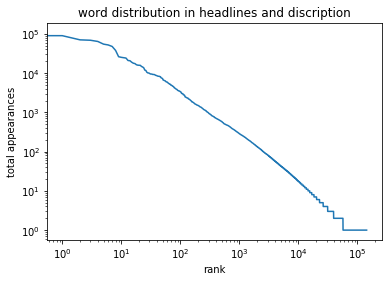

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot([vocabcount[w] for w in list(vocab)]);
plt.gca().set_xscale("log", nonposx='clip')
plt.gca().set_yscale("log", nonposy='clip')
plt.title('word distribution in headlines and discription')
plt.xlabel('rank')
plt.ylabel('total appearances');

### Index words

In [17]:
empty = 0 # RNN mask of no data
eos = 1  # end of sentence
start_idx = eos+1 # first real word

In [18]:
def get_idx(vocab, vocabcount):
    word2idx = dict((word, idx+start_idx) for idx,word in enumerate(vocab))
    word2idx['<empty>'] = empty
    word2idx['<eos>'] = eos
    
    idx2word = dict((idx,word) for word,idx in word2idx.iteritems())

    return word2idx, idx2word

In [19]:
word2idx, idx2word = get_idx(vocab, vocabcount)

In [20]:
word2idx

{'fawn': 56742,
 'considered,': 10450,
 '(Table': 39346,
 'considered.': 10883,
 'considered)': 56744,
 'considered*': 56745,
 'Fame,': 56743,
 '*best*': 39352,
 'considered?': 56747,
 'woods': 26191,
 'spiders': 18303,
 "EDIT:I'd": 39347,
 'hanging': 4347,
 'woody': 56749,
 'trawling': 56750,
 'comically': 39348,
 'protested.': 45069,
 'localized': 15512,
 "EDIT:I'm": 39349,
 'disobeying': 20249,
 'LAST': 56752,
 'amplification,': 56753,
 'course...': 56754,
 'cake,': 15906,
 'virtuoso.': 56756,
 '""dick""': 89539,
 'Western': 1558,
 'cake.': 12782,
 'Euro': 31197,
 'creeps.': 133173,
 'BitCoins,': 56757,
 '""Predatory/Parasitic': 56758,
 'http://www.cnet.com/news/google-yahoo-microsoft-execs-back-cispa-through-trade-group/': 56759,
 '**specific': 39372,
 'commercials."': 56761,
 'Famed': 56762,
 'Blade': 26188,
 'wood,': 26189,
 'wood.': 26190,
 'Myths](http://www.alcor.org/cryomyths.html),': 56891,
 'ever-improving': 56764,
 'impotent.': 31198,
 'nature).': 56766,
 '*eliminate*': 39

In [21]:
fname = 'glove.6B.%dd.txt'%embedding_dim
import os
datadir_base = os.path.expanduser(os.path.join('~', '.keras'))
if not os.access(datadir_base, os.W_OK):
    datadir_base = os.path.join('/tmp', '.keras')
datadir = os.path.join(datadir_base, 'datasets')
glove_name = os.path.join(datadir, fname)
if not os.path.exists(glove_name):
    path = 'glove.6B.zip'
    path = get_file(path, origin="http://nlp.stanford.edu/data/glove.6B.zip")
    !unzip {datadir}/{path}

In [22]:
glove_name

'/Users/saracollins/.keras/datasets/glove.6B.300d.txt'

In [23]:
!wc -l {glove_name}

  400000 /Users/saracollins/.keras/datasets/glove.6B.300d.txt


In [24]:
glove_n_symbols = !wc -l {glove_name}
glove_n_symbols = int(glove_n_symbols[0].split()[0])
glove_n_symbols

400000

In [25]:
import numpy as np

In [26]:
glove_index_dict = {}
glove_embedding_weights = np.empty((glove_n_symbols, embedding_dim))
globale_scale=.1
with open(glove_name, 'r') as fp:
    i = 0
    for l in fp:
        l = l.strip().split()
        w = l[0]
        glove_index_dict[w] = i
        glove_embedding_weights[i,:] = map(float,l[1:])
        i += 1
glove_embedding_weights *= globale_scale

In [27]:
#glove_embedding_weights[0,:]

In [28]:
glove_embedding_weights.std()

0.038177022350764936

In [29]:
for w,i in glove_index_dict.iteritems():
    w = w.lower()
    if w not in glove_index_dict:
        glove_index_dict[w] = i

In [30]:
import numpy as np

# generate random embedding with same scale as glove
np.random.seed(seed)
shape = (vocab_size, embedding_dim)
scale = glove_embedding_weights.std()*np.sqrt(12)/2 # uniform and not normal
embedding = np.random.uniform(low=-scale, high=scale, size=shape)
print 'random-embedding/glove scale', scale, 'std', embedding.std()

random-embedding/glove scale 0.0661245423932 std 0.038186561405


In [31]:
# copy from glove weights of words that appear in our short vocabulary (idx2word)
c = 0
for i in range(vocab_size):
    w = idx2word[i]
    g = glove_index_dict.get(w, glove_index_dict.get(w.lower()))
    if g is None and w.startswith('#'): # glove has no hastags (I think...)
        w = w[1:]
        g = glove_index_dict.get(w, glove_index_dict.get(w.lower()))
    if g is not None:
        embedding[i,:] = glove_embedding_weights[g,:]
        c+=1
print 'number of tokens, in small vocab, found in glove and copied to embedding', c,c/float(vocab_size)

number of tokens, in small vocab, found in glove and copied to embedding 21680 0.542


In [32]:
glove_thr = 0.5

In [33]:
word2glove = {}
for w in word2idx:
    if w in glove_index_dict:
        g = w
    elif w.lower() in glove_index_dict:
        g = w.lower()
    elif w.startswith('#') and w[1:] in glove_index_dict:
        g = w[1:]
    elif w.startswith('#') and w[1:].lower() in glove_index_dict:
        g = w[1:].lower()
    else:
        continue
    word2glove[w] = g

In [34]:
normed_embedding = embedding/np.array([np.sqrt(np.dot(gweight,gweight)) for gweight in embedding])[:,None]

nb_unknown_words = 100

glove_match = []
for w,idx in word2idx.iteritems():
    if idx >= vocab_size-nb_unknown_words and w.isalpha() and w in word2glove:
        gidx = glove_index_dict[word2glove[w]]
        gweight = glove_embedding_weights[gidx,:].copy()
        # find row in embedding that has the highest cos score with gweight
        gweight /= np.sqrt(np.dot(gweight,gweight))
        score = np.dot(normed_embedding[:vocab_size-nb_unknown_words], gweight)
        while True:
            embedding_idx = score.argmax()
            s = score[embedding_idx]
            if s < glove_thr:
                break
            if idx2word[embedding_idx] in word2glove :
                glove_match.append((w, embedding_idx, s)) 
                break
            score[embedding_idx] = -1
glove_match.sort(key = lambda x: -x[2])
print '# of glove substitutes found', len(glove_match)

KeyboardInterrupt: 

In [35]:
for orig, sub, score in glove_match[-10:]:
    print score, orig,'=>', idx2word[sub]

0.582442168793 soaked => washed
0.687478843672 preservatives => additives
0.642412293674 instructs => instruct
0.807375419709 reelection => re-election
0.610052182701 Timor => Indonesia
0.55775106396 salespeople => salesmen
1.0 INSENSITIVE => insensitive
1.0 CLEARLY => clearly
0.530094004506 hasten => accelerate
0.511003839893 Tycoons => businessmen


In [36]:
glove_idx2idx = dict((word2idx[w],embedding_idx) for  w, embedding_idx, _ in glove_match)

In [37]:
glove_idx2idx

{65536: 13394,
 98309: 34732,
 65545: 15331,
 65547: 27133,
 98316: 873,
 98317: 26262,
 109229: 25236,
 65552: 9217,
 65555: 19497,
 65560: 6019,
 98332: 21533,
 65569: 32037,
 98339: 21181,
 49158: 26427,
 65574: 8725,
 98347: 11940,
 65581: 3862,
 87389: 15254,
 131122: 14005,
 98356: 27158,
 98358: 20292,
 98366: 9001,
 43704: 2087,
 65619: 32043,
 98390: 18885,
 65624: 37431,
 65625: 12885,
 98396: 36837,
 98320: 8202,
 65635: 8526,
 65644: 34732,
 98417: 39297,
 98419: 20076,
 65652: 12807,
 54633: 25968,
 65658: 22651,
 120170: 6328,
 65664: 951,
 65669: 27831,
 98450: 14345,
 65687: 7901,
 65690: 11644,
 65693: 19292,
 98465: 9883,
 65699: 14689,
 76486: 23396,
 98471: 13050,
 114717: 29236,
 98482: 12369,
 98493: 755,
 65727: 38240,
 65728: 26512,
 98497: 14640,
 98509: 7624,
 65742: 5647,
 98514: 15256,
 98517: 38719,
 98526: 8840,
 65772: 10853,
 65778: 7405,
 65784: 21064,
 98554: 17470,
 40380: 33931,
 131327: 10510,
 98562: 4856,
 131344: 3450,
 65812: 7238,
 98586: 21605

### Import w2v 

In [41]:
import gensim

In [42]:
w2v_model = gensim.models.Word2Vec.load('./reddit_wv_model.wv')

In [43]:
w2v_vectors = w2v_model.wv

In [44]:
w2v_n_symbols = len(w2v_vectors.vocab)

In [45]:
w2v_index_dict = {}
w2v_embedding_weights = np.empty((glove_n_symbols, embedding_dim))
globale_scale=.1 # See if this is necessary.

In [46]:
i = 0
for l in w2v_vectors.index2word:
    w = l
    w2v_index_dict[w] = i
    vector_matrix = w2v_vectors.word_vec(w)
    w2v_embedding_weights[i,:] = map(float,vector_matrix[:])
    i += 1
w2v_embedding_weights *= globale_scale

In [47]:
w2v_embedding_weights.std()

0.0068774813538694255

In [48]:
for w,i in w2v_index_dict.iteritems():
    w = w.lower()
    if w not in w2v_index_dict:
        w2v_index_dict[w] = i

In [49]:
import numpy as np

# generate random embedding with same scale as glove
np.random.seed(seed)
shape = (vocab_size, embedding_dim)
scale = w2v_embedding_weights.std()*np.sqrt(12)/2 # uniform and not normal
embedding = np.random.uniform(low=-scale, high=scale, size=shape)
print 'random-embedding/glove scale', scale, 'std', embedding.std()

random-embedding/glove scale 0.011912147133 std 0.0068791997872


In [50]:
#idx2word

In [51]:
# copy from glove weights of words that appear in our short vocabulary (idx2word)
c = 0
for i in range(vocab_size):
    w = idx2word[i]
    g = w2v_index_dict.get(w, w2v_index_dict.get(w.lower()))
    if g is None and w.startswith('#'): # glove has no hastags (I think...)
        w = w[1:]
        g = w2v_index_dict.get(w, w2v_index_dict.get(w.lower()))
    if g is not None:
        embedding[i,:] = w2v_embedding_weights[g,:]
        c+=1
print 'number of tokens, in small vocab, found in glove and copied to embedding', c,c/float(vocab_size)

number of tokens, in small vocab, found in glove and copied to embedding 18364 0.4591


In [52]:
w2v_thr = 0.5

In [53]:
word2w2v = {}
for w in word2idx:
    if w in w2v_index_dict:
        g = w
    elif w.lower() in w2v_index_dict:
        g = w.lower()
    elif w.startswith('#') and w[1:] in w2v_index_dict:
        g = w[1:]
    elif w.startswith('#') and w[1:].lower() in w2v_index_dict:
        g = w[1:].lower()
    else:
        continue
    word2w2v[w] = g

In [54]:
word2w2v

{'Poetry': 'poetry',
 'woods': 'woods',
 'spiders': 'spiders',
 'hanging': 'hanging',
 'woody': 'woody',
 'localized': 'localized',
 'disobeying': 'disobeying',
 'LAST': 'last',
 'Adjusting': 'adjusting',
 'originality': 'originality',
 'Journey': 'journey',
 'Western': 'western',
 'Euro': 'euro',
 'Famed': 'famed',
 'Blade': 'blade',
 'eugenics': 'eugenics',
 'appropriation': 'appropriation',
 'bringing': 'bringing',
 'wednesday': 'wednesday',
 'stereotypical': 'stereotypical',
 'Colonialism': 'colonialism',
 'DEMAND': 'demand',
 'feasibility': 'feasibility',
 'Iphone': 'iphone',
 'sustaining': 'sustaining',
 'consenting': 'consenting',
 'Honorable': 'honorable',
 'inanimate': 'inanimate',
 'errors': 'errors',
 'Initially': 'initially',
 'cooking': 'cooking',
 'Hamilton': 'hamilton',
 'designing': 'designing',
 'replaced': 'replaced',
 'succumb': 'succumb',
 'shocks': 'shocks',
 'Logging': 'logging',
 'brainwashed': 'brainwashed',
 'china': 'china',
 'affiliated': 'affiliated',
 'kids

In [55]:
normed_embedding = embedding/np.array([np.sqrt(np.dot(gweight,gweight)) for gweight in embedding])[:,None]

nb_unknown_words = 100

In [56]:
w2v_match = []
for w,idx in word2idx.iteritems():
    if idx >= vocab_size-nb_unknown_words and w.isalpha() and w in word2w2v:
        gidx = w2v_index_dict[word2w2v[w]]
        gweight = w2v_embedding_weights[gidx,:].copy()
        # find row in embedding that has the highest cos score with gweight
        gweight /= np.sqrt(np.dot(gweight,gweight))
        score = np.dot(normed_embedding[:vocab_size-nb_unknown_words], gweight)
        while True:
            embedding_idx = score.argmax()
            s = score[embedding_idx]
            if s < w2v_thr:
                break
            if idx2word[embedding_idx] in word2w2v :
                w2v_match.append((w, embedding_idx, s)) 
                break
            score[embedding_idx] = -1
w2v_match.sort(key = lambda x: -x[2])
print '# of w2v substitutes found', len(w2v_match)

# of w2v substitutes found 5197


In [57]:
for orig, sub, score in w2v_match[-10:]:
    print score, orig,'=>', idx2word[sub]

0.505933761724 synonyms => voodoo
0.505780018418 respectively => Autumn
0.505397972246 ah => hug
0.50476681537 OCD => resignation
0.504252000381 Buzzfeed => dictionary
0.503813250075 CMVers => update
0.502658409445 manmade => Mosaic
0.502122813469 citation => crystal
0.501646949854 aspirations => gatherings
0.501602812475 goodwill => cricket


In [58]:
w2v_idx2idx = dict((word2idx[w],embedding_idx) for  w, embedding_idx, _ in w2v_match)

In [59]:
# Translate this
Y = [[word2idx[token] for token in headline.split()] for headline in sentences]
len(Y)

10744

In [60]:
import cPickle as pickle
with open('data/%s.pkl'%FN,'wb') as fp:
    pickle.dump((embedding, idx2word, word2idx, w2v_idx2idx),fp,-1)

In [61]:
import cPickle as pickle
with open('data/%s.data.pkl'%FN,'wb') as fp:
    pickle.dump((Y),fp,-1)